In [11]:
# db에서 csv로 출력
import pymongo
import os
import re
import time
import csv

database = 'soodb'
conn = pymongo.MongoClient('mongodb://localhost:27017')
print('MongoClient 접속 완료')

# db 객체 할당받기
db = conn.get_database(database)

# collection 객체 할당받기
coll = 'address'
collection = db.get_collection(coll)

path = 'C:/Users/Kosmo/Desktop/Test/'
file_name = 'Test.csv'


if not os.path.exists(path):
    os.makedirs(path)
else:
    i = 0
    posts = list(collection.find())
    with open(os.path.join(path, file_name), 'w', newline='', encoding='utf-8-sig') as output:
        csvout = csv.DictWriter(output,['_id', 'name','addr','rdate'])
        csvout.writeheader()
        for post in posts:
            wr = csv.writer(output)
            wr.writerow([ post['_id'],post['name'],post['addr'],post['rdate'] ])
            # 진행률을 출력하기 위한 부분
            i += 1
            if i % 100:
                print("{} finished".format(i))

print('[{}] End!!!'.format(coll))

MongoClient 접속 완료
1 finished
2 finished
3 finished
4 finished
5 finished
6 finished
7 finished
8 finished
9 finished
10 finished
11 finished
[address] End!!!


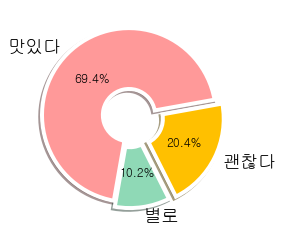

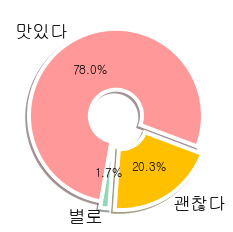

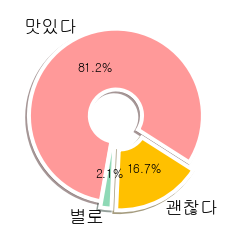

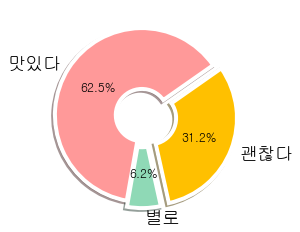

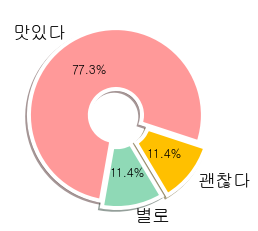

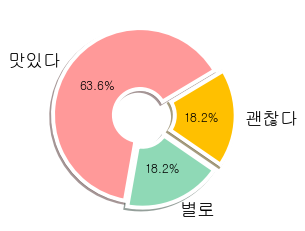

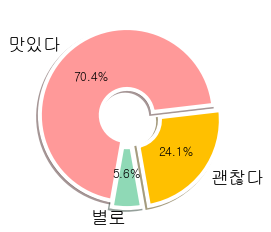

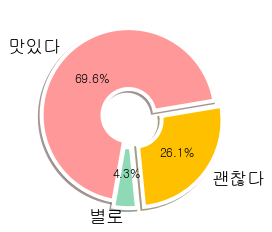

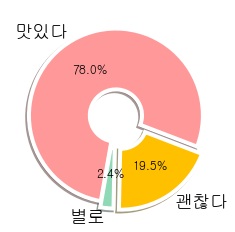

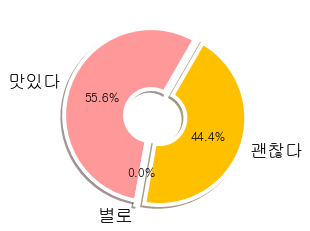

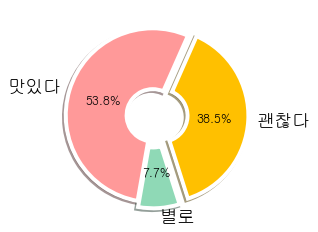

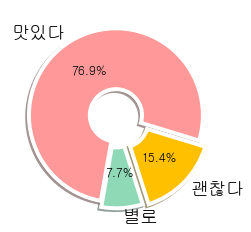

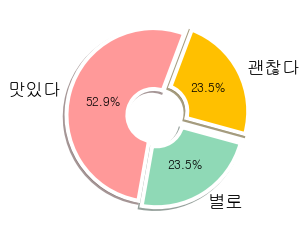

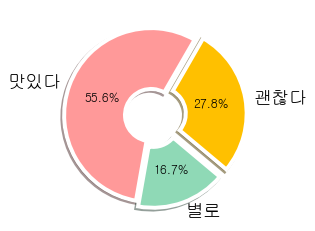

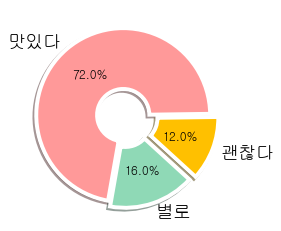

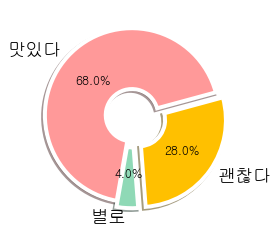

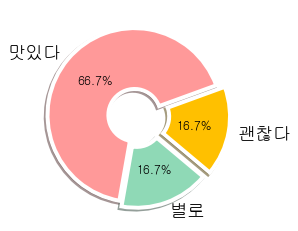

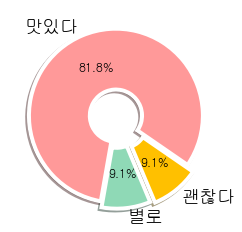

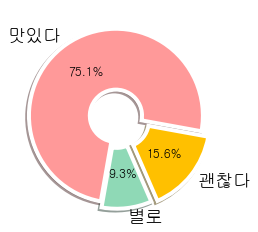

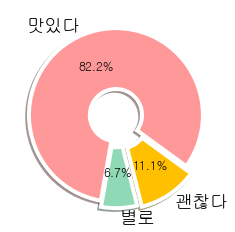

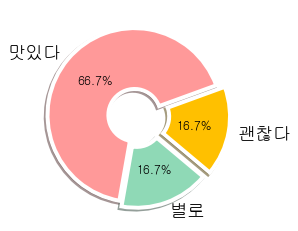

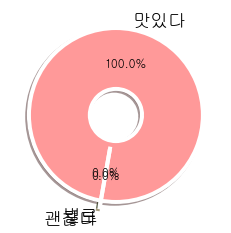

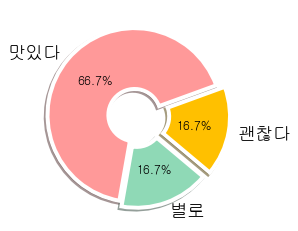

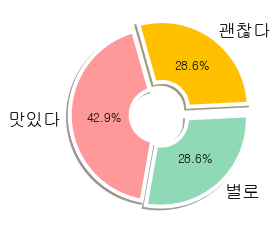

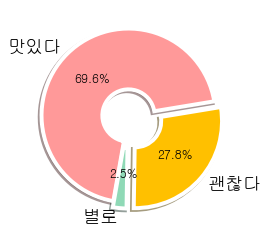

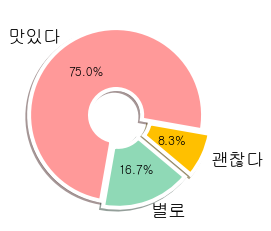

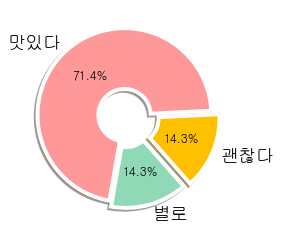

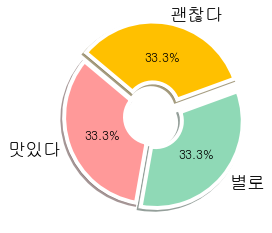

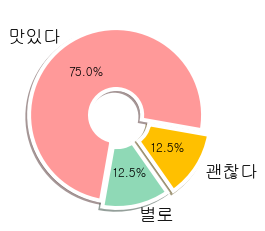

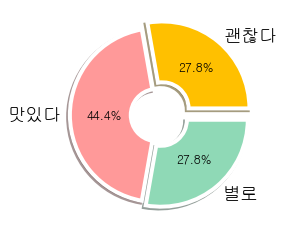

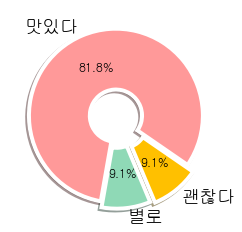

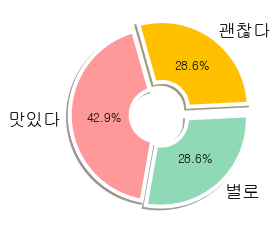

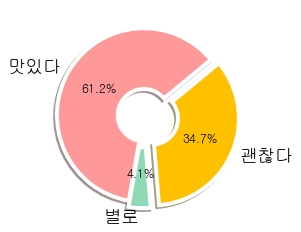

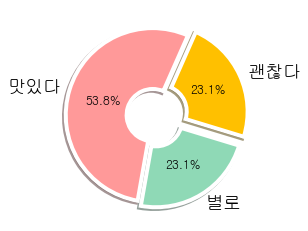

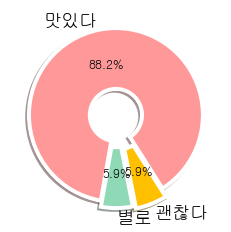

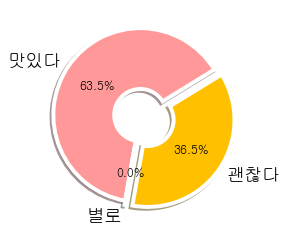

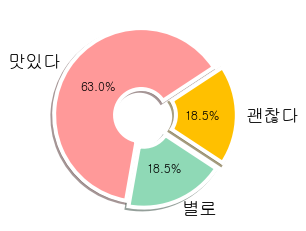

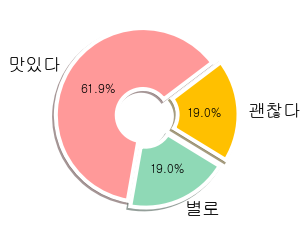

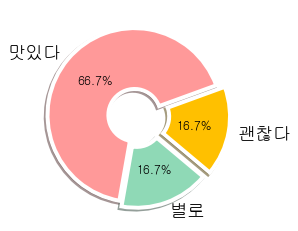

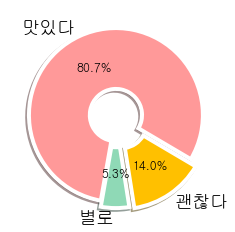

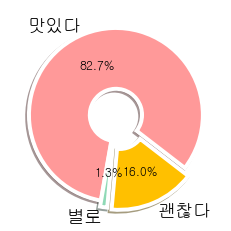

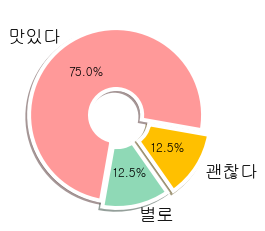

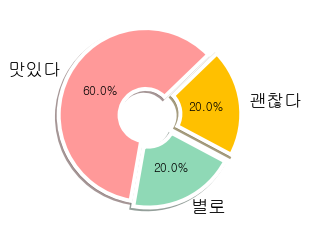

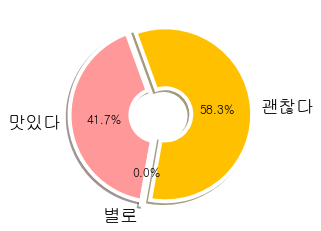

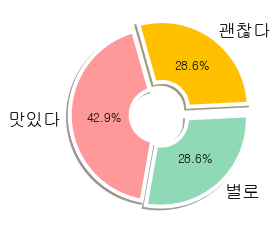

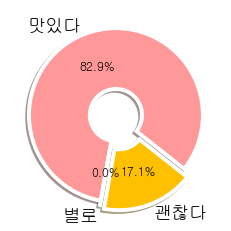

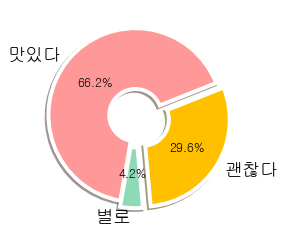

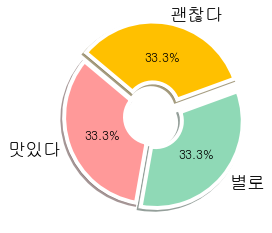

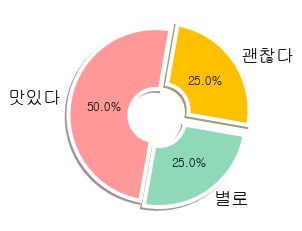

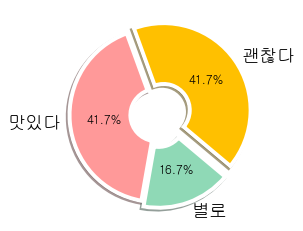

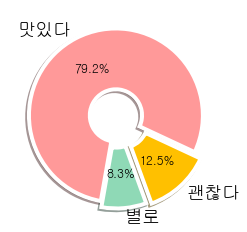

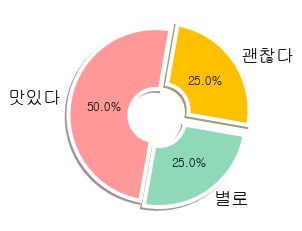

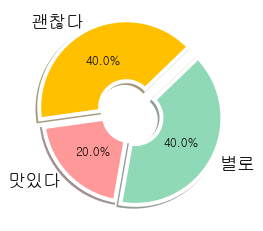

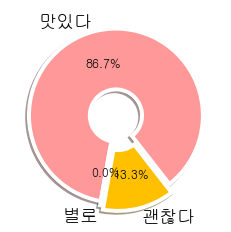

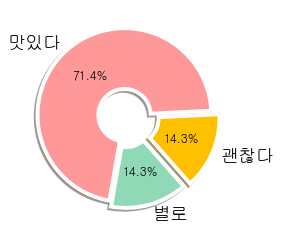

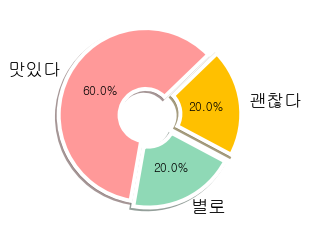

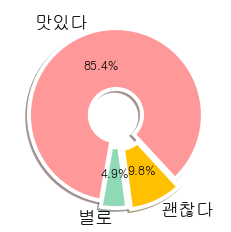

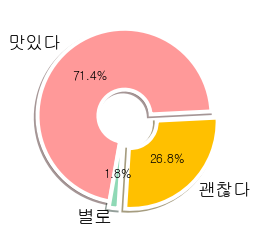

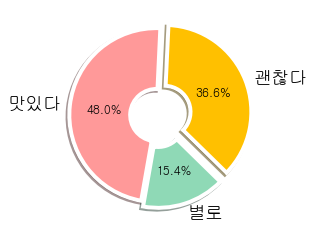

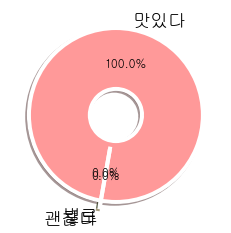

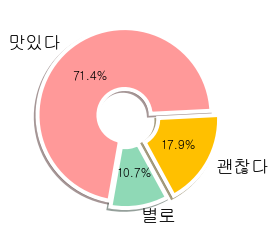

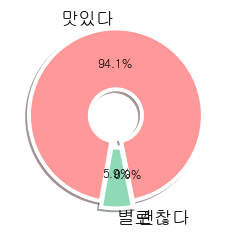

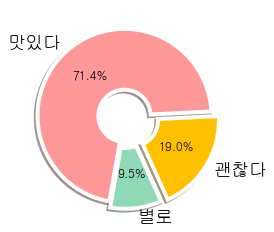

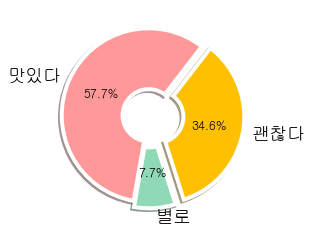

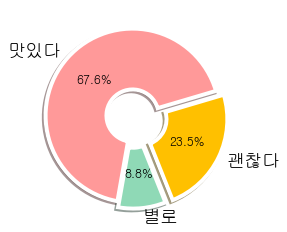

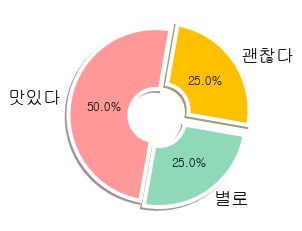

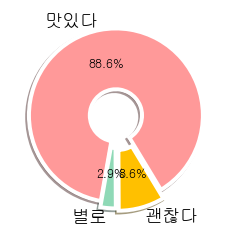

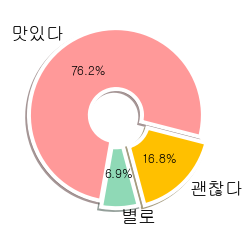

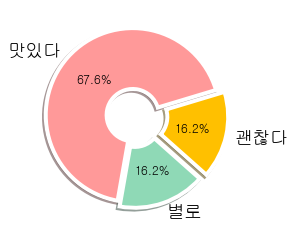

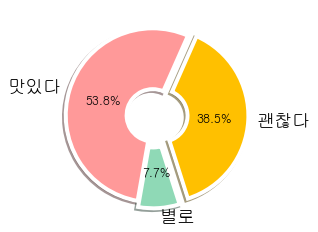

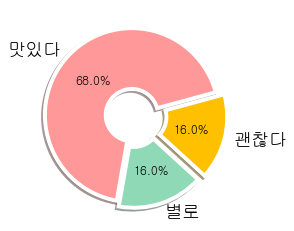

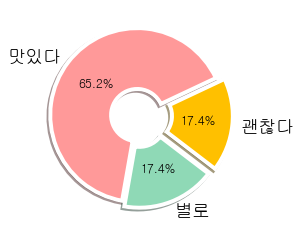

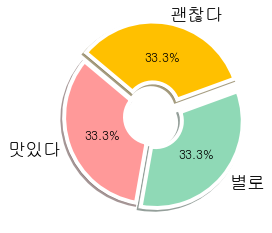

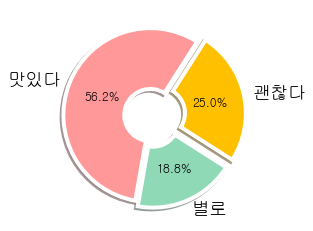

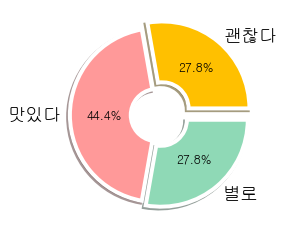

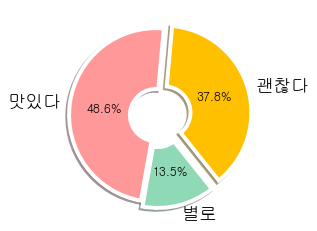

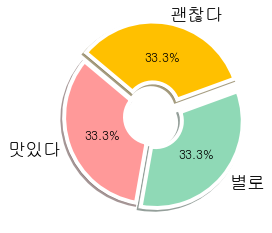

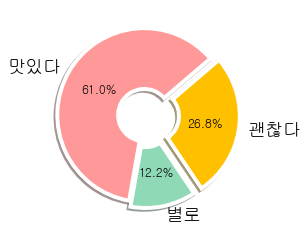

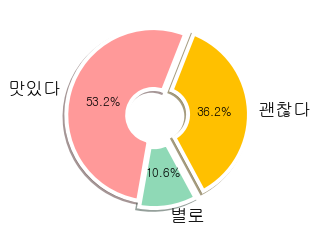

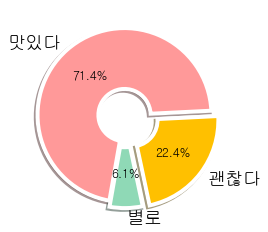

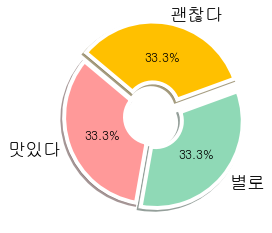

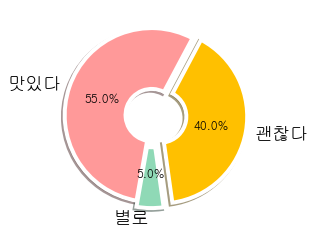

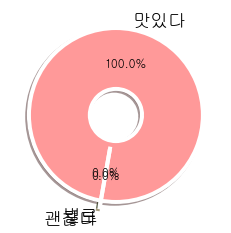

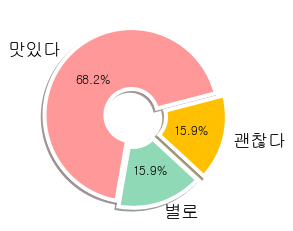

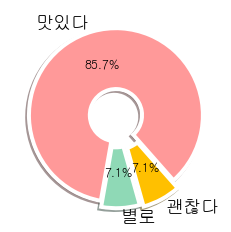

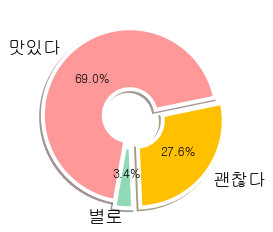

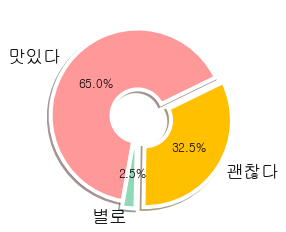

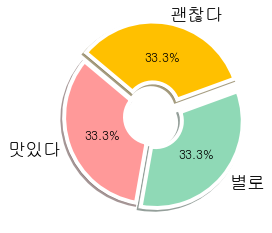

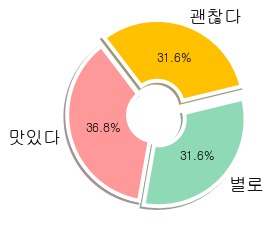

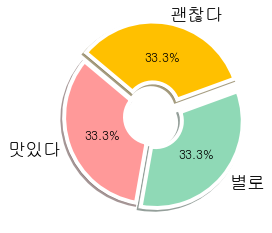

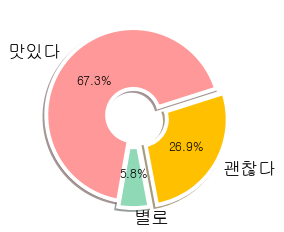

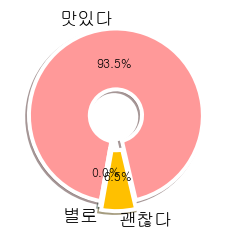

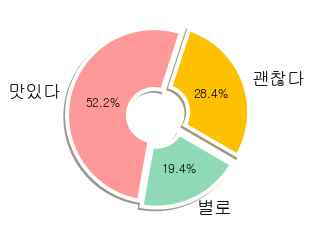

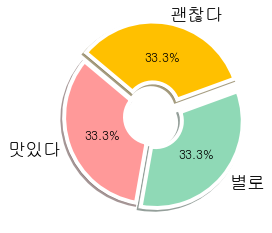

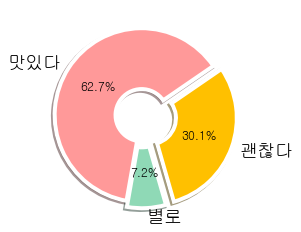

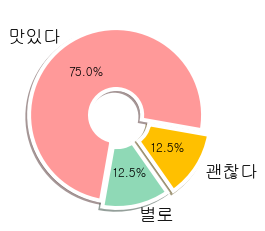

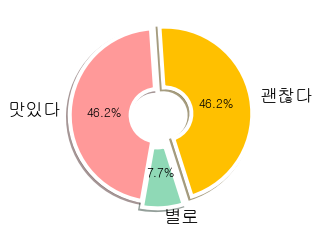

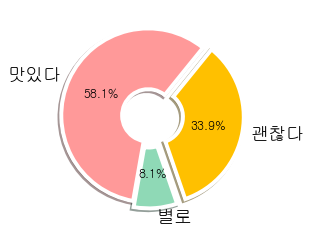

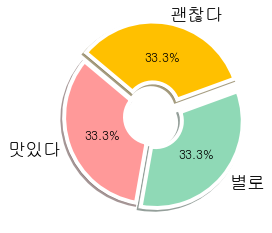

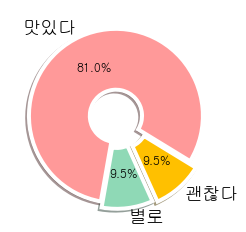

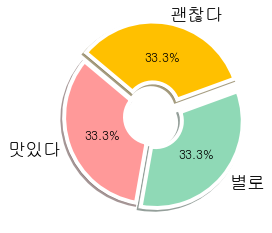

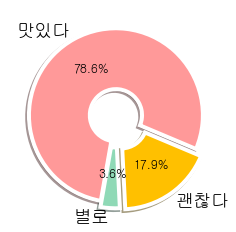

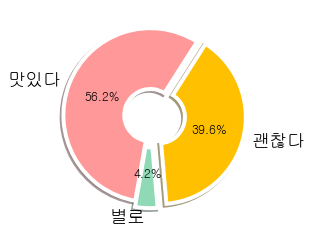

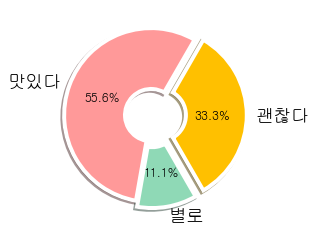

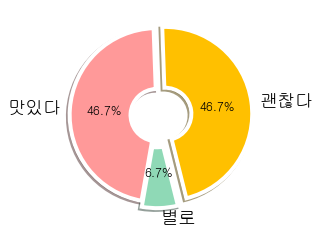

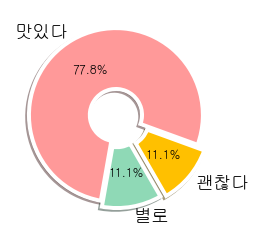

KeyboardInterrupt: 

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
from pymongo import MongoClient, mongo_client
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

url = "mongodb://192.168.0.138:27017/"
mgClient = mongo_client.MongoClient(url)
db = mgClient["restaurants"]
col = db["review_info_list"]

for data in col.find():
    a = data['count']
    path="C:/Users/Kosmo/Desktop/Test/"
    plt.rc('font', size=18)

    ratio = [a[1], a[2], a[3]]
    labels = ['맛있다', '괜찮다', '별로']
    colors = ['#ff9999', '#ffc000', '#8fd9b6']
    wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 4}
    explode = [0, 0.10, 0.07]

    _,_, autotexts = plt.pie(ratio, labels=labels, autopct='%.1f%%',shadow=True, startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops, explode=explode)
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize('12')

    #plt.savefig(path+"test.png",format='png',dpi=300, facecolor="white")
    plt.show()
